In [1]:
import numpy as np
import pandas as pd

In [117]:
# https://ourworldindata.org/covid-deaths
d2 = pd.read_csv('C:/Users/Administrator/Desktop/exam/owid-covid-data.csv')
d2.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [118]:
d2.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units'],
      dtype='object')

In [90]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = px.bar(d2[d2['location']=='World'], x="date", y="total_cases_per_million", height=400, width=1000,
             title='total_cases_per_million')
fig.show()


In [96]:
fig = px.bar(d2[d2['location']=='World'], x="date", y="total_deaths", height=400, width=1000,
             title='total_deaths')
fig.show()


In [103]:
d2['date'] = pd.to_datetime(d2['date'])
d2['Day'] = d2['date'].apply(lambda x:x.day)
d2['Hour'] = d2['date'].apply(lambda x:x.hour)

In [18]:
import plotly.express as px
fig = px.scatter_geo(d2, locations="location", locationmode='country names',hover_name="location", projection="robinson",
                     title='Spread Death  across the world')
# fig.update(layout_coloraxis_showscale=True)
fig.show()

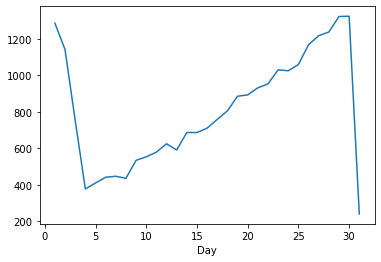

In [116]:
d2.groupby('Day').sum()['total_tests_per_thousand'].plot();

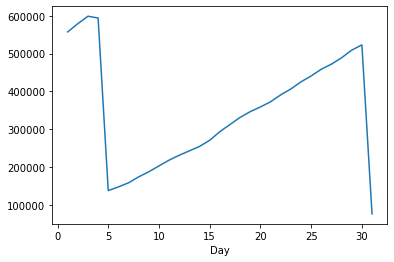

In [20]:
d2.groupby('Day').sum()['total_deaths'].plot();

In [ ]:
d21 = d2.groupby('location')['new_cases'].sum().reset_index().sort_values(by= ['new_cases'],ascending=False).head(15)

In [ ]:
d22 = d2.groupby('location')['total_cases'].sum().reset_index().sort_values(by= ['total_cases'],ascending=False).head(15)


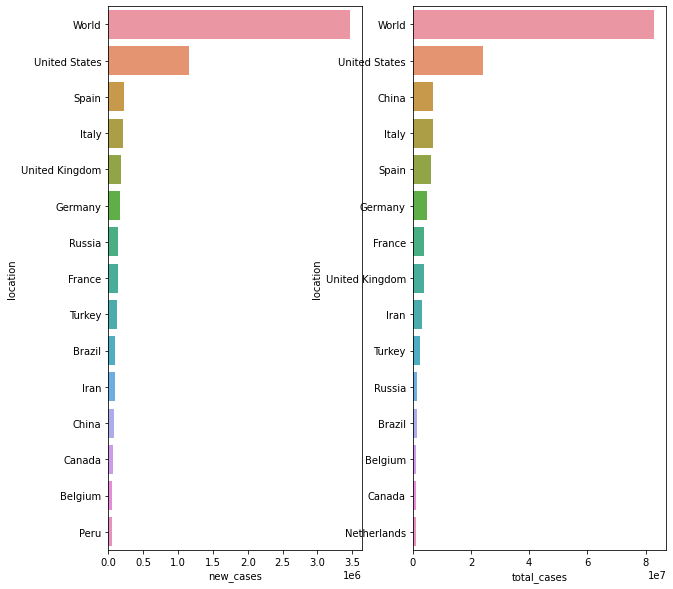

In [78]:
import seaborn as  sns

fig, axes = plt.subplots(ncols=2, figsize=(10,10))
sns.barplot(x ='new_cases' ,y = 'location' ,data = d21,ax = axes[0]);
sns.barplot(x ='total_cases' ,y ='location' ,data = d22,ax = axes[1]);



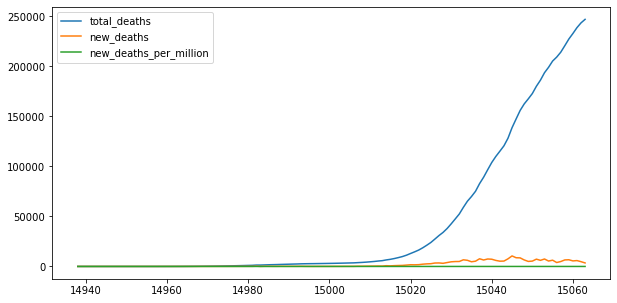

In [114]:
b1 = d2[d2['location']=='World']
tick = ['total_deaths','new_deaths','new_deaths_per_million']
for t in tick:
    b1[t].plot(figsize=(10,5))
plt.legend()